<a href="https://colab.research.google.com/github/jshuaaaa/TensorFlow-Notebook/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook were going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another for example:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is hard to understand, lets visualize it

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


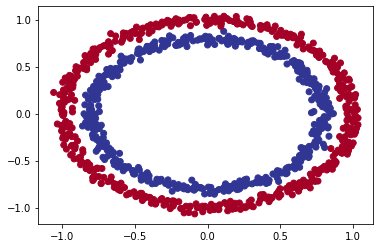

In [5]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typicall:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4820


In [9]:
# Lets try training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since were working on a binary classifcation problem our model is getting around ~50% accuray it is esssentially only guessing

lets try adding another layer

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [11]:
# Evaluate model 2
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving our model

Lets look and see how else we can improve our model as 50% is not a satisfactory result for our model

How we can improve our model:

1. Create a model - we might add more layers or increase number of hidden units within a layer
2. Compiling a model - we might want to choose a different optimization function such as Adam
3. Fitting a model - perhaps we might fit our model for more epochs

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [13]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

To visualize our models predicitions lets create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a mesh gridof the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  inspired from:
  1. Made With ML
  2. cs231n neural networks case study
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X Value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We must reshape our predictions
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


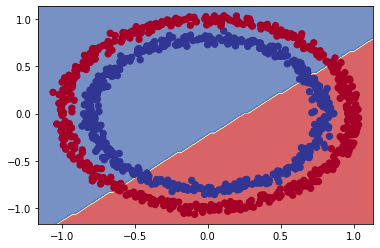

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [17]:
# Lets see if our model would work for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait our model was compiled for a binary classification problem. but we are now working on a regression problem lets change the model to suit the current data

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


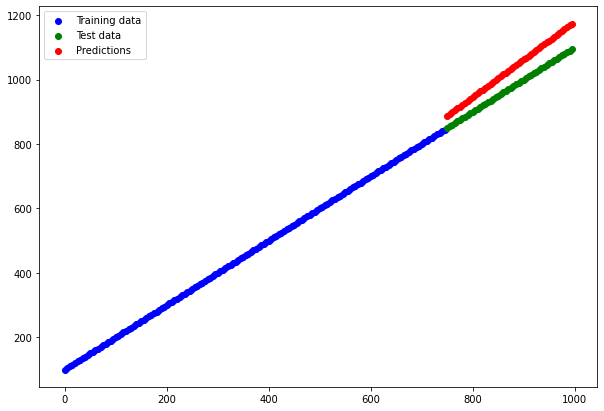

In [19]:
# Make predictions with our trained model
y_reg_preds= model_3.predict(X_reg_test)
# plot predictions against regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [20]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
    
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/100
32/32 [=

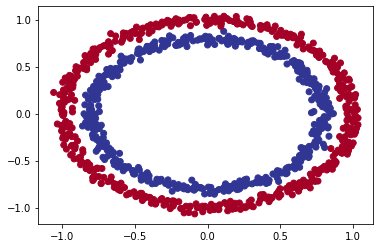

In [21]:
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


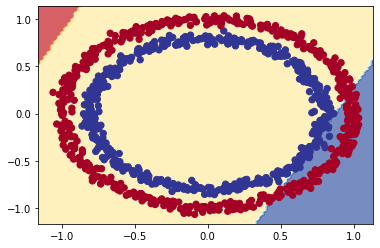

In [22]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Lets build a model with a non lineary activation

In [23]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


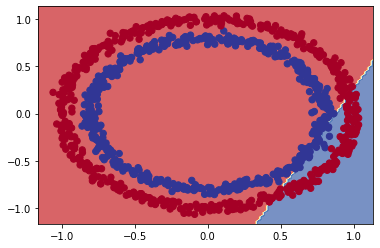

In [24]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [25]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5140
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5410
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5110
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


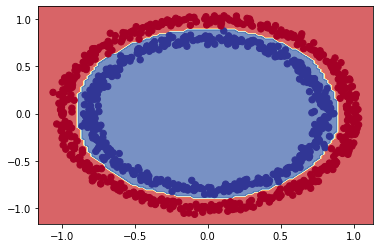

In [26]:
plot_decision_boundary(model=model_6, X=X, y=y)

**A Quick note:** is that the combination of linear and non linear functions is a key fundamental to developing neural networks

Now that we have learned the concept of this lets see this in action below

In [27]:
# Create a toy tensor (similar to data for our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

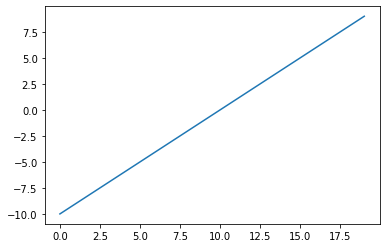

In [28]:
# Visualize toy tensor
plt.plot(A)

In [29]:
# Lets start by replicating the sigmoid function: sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

# Use the sigmoid on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

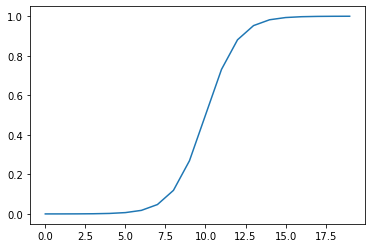

In [30]:
# Plot our toy tensor
plt.plot(sigmoid(A))

In [31]:
# Lets replicate relu now: relu(x) = max(x, 0)
def relu(x):
  return tf.maximum(x, 0)

# Lets try to use the function on our toy now
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

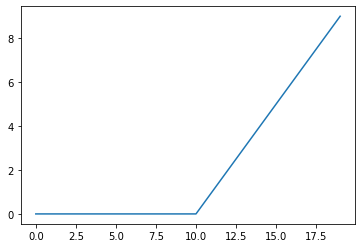

In [32]:
# Visualize relu modified tensor
plt.plot(relu(A))

In [33]:
# Lets try lineary activation function: returns input unmodified
def linear(x):
  return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

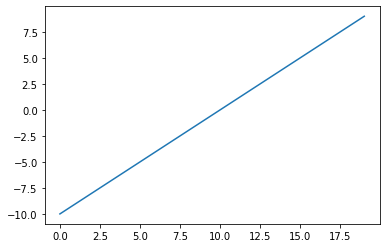

In [34]:
# Visualize linear data (should be unchanged)
plt.plot(linear(A))

In [35]:
# Is our data the same as linear activation?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

**A learning rescource for activation functions:** https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and imporving our classification model

Lets now create a working training and testing set, as using the same dataset for evaluation and training is a sinful activity in machine learning

In [36]:
len(X)

1000

In [37]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [38]:
# Lets recreate a model to fit on to training data
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history = model_7.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4863
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6862
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6825
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.8850
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.8175
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.9438
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.9250
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.9425
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9825
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.9975
Epoch 11/

In [39]:
# Evaluate our model
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005146097391843796, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


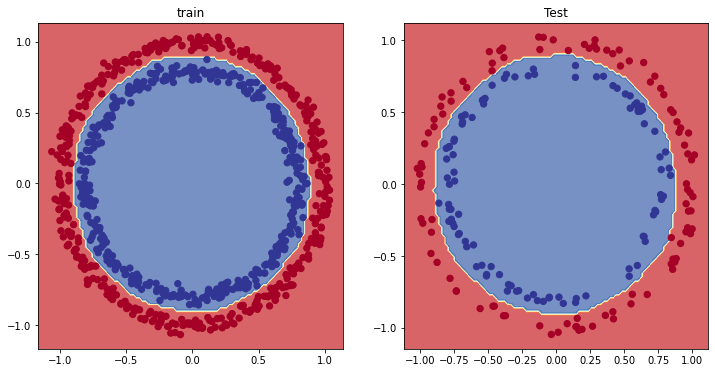

In [40]:
# Visualize our data from training
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)
plt.show()

## Plotting the loss  (of training) or better known as our model's learning curves



In [41]:
# Convert history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.690614,0.48625
1,0.666291,0.68625
2,0.633163,0.68250
3,0.583333,0.88500
4,0.535166,0.81750
...,...,...
95,0.004994,1.00000
96,0.003988,1.00000
97,0.003728,1.00000
98,0.003755,1.00000


Text(0.5, 1.0, 'Model Loss Curves')

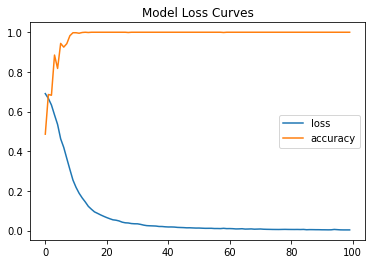

In [42]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model Loss Curves")

**Note:** For many problems, the loss function going down means the model is improving (the predicitions its making are getting closer to the ground truth labels).

## Using callbacks to find the ideal learning rate

To find the ideal learning rate ( the learning rate where the loss decreases the most during training) we are goiing to use the following steps:
* A learning rate **callback** - thinks of a callback as ane xtra piece of functionality yuou can addd to your model while its training
* Another model (we could use the same one as above, but we are praciticing building models so we will make a new one)
* A modified loss curve plot.

In [43]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fitting model with callback
history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

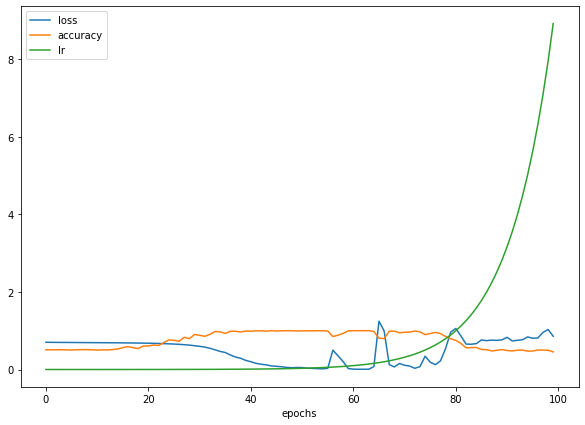

In [44]:
# Checkout the history
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

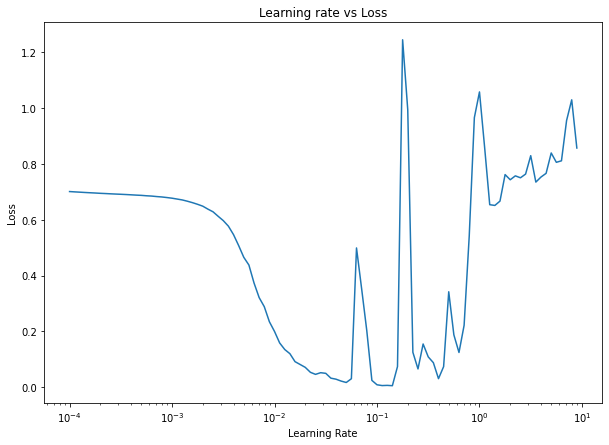

In [45]:
# Plot the learning rate values vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

**Note:** A general rule is the ideal learning rate is going to be at the between the lowest point in the curve, and 10x smaller then that lowest point, in this case somewhere between 10^-2, and 10^-1

In [46]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

**Note:** Most common classification evaluation methods consist of Accuracy, precision, recall, F1-Score and a confusion matrix

## More classification evaluation methods

Alongside visualizing our models results, lets now evaluate them on some other metrics

In [47]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Mode accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4950
Model loss on the test set: 0.6932645440101624
Mode accuracy on the test set: 49.50%


Creating a confusion matrix!

In [48]:
from sklearn.metrics import confusion_matrix

In [50]:
# Make preds
y_preds = model_7.predict(X_test)
# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [51]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005146097391843796, 1.0]

In [52]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

Predicitions arry has come out in prediction probability form and we need to fix it!

In [53]:
y_preds[:10]

array([[9.97538626e-01],
       [9.99991238e-01],
       [9.99078631e-01],
       [9.99925971e-01],
       [1.58855338e-02],
       [1.04150946e-04],
       [9.96313632e-01],
       [1.16548894e-04],
       [9.99353826e-01],
       [1.74442670e-04]], dtype=float32)

In [54]:
# Conert prediction probabilites to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [55]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

**Lets make our confusion matrix prettier!**

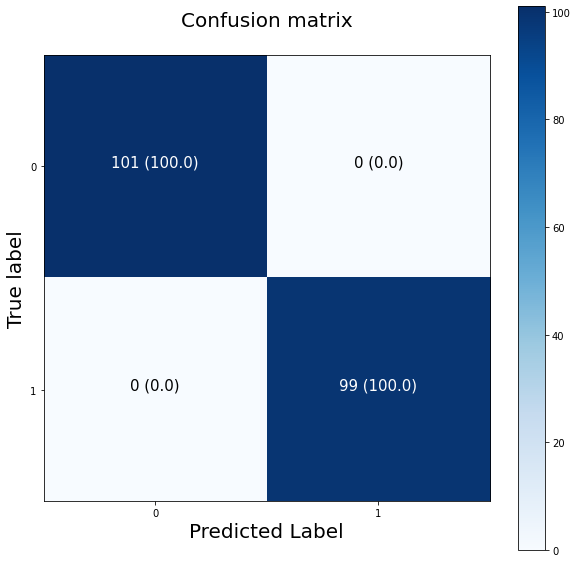

In [86]:
# Note: the confusion matrix code were about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Lets prettify it
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Set x-axis labels to bottom

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more then two classes as an option, its known as **mutli-class classification**.

* This means if you have three different classes, it's multi-class classification.
* It also means if you have 100 different classes, its multi-class classification.

Now we're going to build a neural network to classify images of different items of clothing.

In [57]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data is already in training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [58]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [59]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

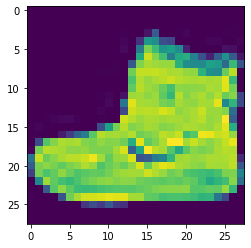

In [60]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [61]:
# Check out samples label
train_labels[0] # 9 is a boot, we should output 9

9

In [62]:
# Create a small list so we can index onto our training labels so theyre human-readable
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle bott"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

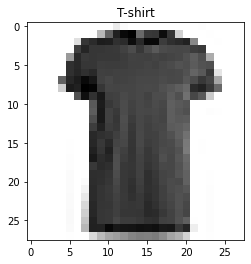

In [63]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

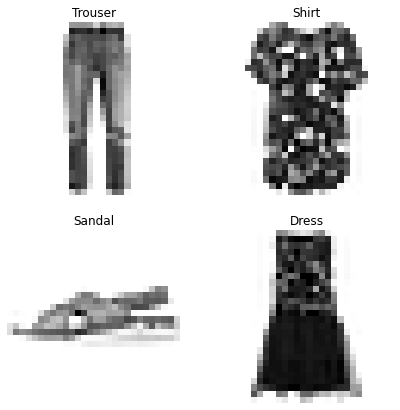

In [64]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model 

For multi-class we have to modify the architecture of our model by quite a bit, we must do the following changes:
* Input shape = 28 x 28 (shape of image0
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy (If labels are not one hot encoded use SparseCategoricalCrossentropy())
* Output layer activation = Softmax

In [65]:
tf.random.set_seed(42)

fashion_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

non_norm_history = fashion_model_1.fit(train_data,
                                       tf.one_hot(train_labels, depth=10),
                                       epochs=10,
                                       validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.5590 - accuracy: 0.6719 - val_loss: 0.9045 - val_accuracy: 0.6781
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8223 - accuracy: 0.7050 - val_loss: 0.7542 - val_accuracy: 0.7105
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7038 - accuracy: 0.7259 - val_loss: 0.7290 - val_accuracy: 0.7164
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6579 - accuracy: 0.7341 - val_loss: 0.6394 - val_accuracy: 0.7405
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6252 - accuracy: 0.7434 - val_loss: 0.6827 - val_accuracy: 0.7152
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6076 - accuracy: 0.7579 - val_loss: 0.7171 - val_accuracy: 0.7589
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5766 - accuracy: 0.7875 - val_loss: 0.6145 - val_accuracy:

In [66]:
# Check the model summary
fashion_model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Check the min and max of the trainingin data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled (or normalized), this means they like to have the number in the tensors they to find patterns in between 0 & 1

In [68]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [70]:
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

history = fashion_model_2.fit(train_data_norm,
                                       tf.one_hot(train_labels, depth=10),
                                       epochs=10,
                                       validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5054 - accuracy: 0.8235 - val_loss: 0.4221 - val_accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3792 - accuracy: 0.8642 - val_loss: 0.4478 - val_accuracy: 0.8496
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.8770 - val_loss: 0.3835 - val_accuracy: 0.8597
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3172 - accuracy: 0.8849 - val_loss: 0.3712 - val_accuracy: 0.8647
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.8888 - val_loss: 0.3640 - val_accuracy: 0.8692
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2838 - accuracy: 0.8950 - val_loss: 0.3702 - val_accuracy: 0.8601
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.8978 - val_loss: 0.3589 - val_accuracy:

**Note:** As seen in the two models the normalized data model is performing significantly better then the non normalized data

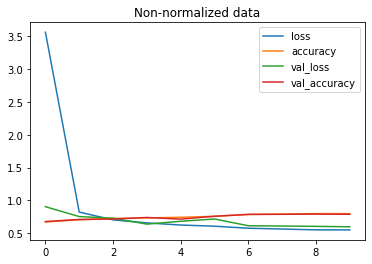

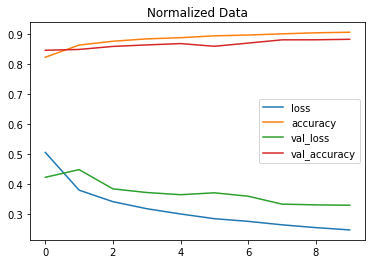

In [71]:
import pandas as pd
# Plot non-normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(history.history).plot(title="Normalized Data")

**Note:** The same model with even slightly different data can perform dramatically different

## Finding the ideal learning rate


In [73]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = fashion_model_3.fit(train_data_norm,
                                       tf.one_hot(train_labels, depth=10),
                                       epochs=40,
                                       validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5054 - accuracy: 0.8235 - val_loss: 0.4221 - val_accuracy: 0.8468 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3823 - accuracy: 0.8626 - val_loss: 0.4611 - val_accuracy: 0.8478 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.8751 - val_loss: 0.3811 - val_accuracy: 0.8619 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3260 - accuracy: 0.8814 - val_loss: 0.3876 - val_accuracy: 0.8601 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8841 - val_loss: 0.3626 - val_accuracy: 0.8689 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.8875 - val_loss: 0.3903 - val_accuracy: 0.8568 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

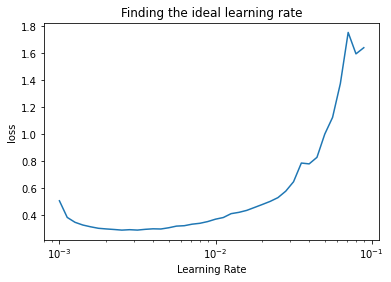

In [76]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

In [80]:
# Ideal learning rate appears to be slight faster then the default adam learning rate
lr = 10**-2.8
lr

0.001584893192461114

Lets try fitting our model with our optimal learning rate

In [83]:
tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                        metrics=["accuracy"])

history = fashion_model_4.fit(train_data_norm,
                                       tf.one_hot(train_labels, depth=10),
                                       epochs=40,
                                       validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4919 - accuracy: 0.8256 - val_loss: 0.4187 - val_accuracy: 0.8459
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3705 - accuracy: 0.8655 - val_loss: 0.4402 - val_accuracy: 0.8488
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3368 - accuracy: 0.8766 - val_loss: 0.3837 - val_accuracy: 0.8572
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3141 - accuracy: 0.8859 - val_loss: 0.3662 - val_accuracy: 0.8679
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2989 - accuracy: 0.8895 - val_loss: 0.3602 - val_accuracy: 0.8700
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2864 - accuracy: 0.8946 - val_loss: 0.3774 - val_accuracy: 0.8612
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2757 - accuracy: 0.8971 - val_loss: 0.3695 - val_accuracy

## Evaluating our multi-class classification model

To evalute our multi-class classification model we could:

* Evaluate using other classification metrics (confusion matrix)
* Assess its predictions (through visualizations)
* Improve its results
* Save and export it for use in an application

Lets do the top two

In [103]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
# Note: the confusion matrix code were about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

def make_confusion_matrix(y_true, y_preds, classes=None, figsize=(10,10), text_size=10):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Lets prettify it
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Set x-axis labels to bottom

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [90]:
# Make some predictions with our model
y_probs = fashion_model_4.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[9.2249189e-33, 1.2200401e-24, 3.8475111e-27, 3.1021741e-25,
        1.3515559e-36, 3.0220340e-07, 1.8972726e-21, 1.4702277e-04,
        6.9460724e-23, 9.9985266e-01],
       [2.0796801e-06, 3.4640564e-23, 9.9955887e-01, 1.4138683e-16,
        3.9371004e-04, 7.3705871e-18, 4.5257118e-05, 1.6642417e-16,
        1.1536093e-12, 1.4194961e-21],
       [6.7025436e-18, 9.9999994e-01, 2.3918684e-36, 2.4285493e-16,
        9.6172281e-25, 0.0000000e+00, 8.9795453e-24, 0.0000000e+00,
        1.3756839e-29, 0.0000000e+00],
       [6.4578753e-20, 9.9999994e-01, 5.7507032e-35, 4.7753620e-13,
        2.5578589e-23, 0.0000000e+00, 7.5488947e-21, 0.0000000e+00,
        7.9521696e-29, 0.0000000e+00],
       [1.8433541e-01, 2.0608706e-16, 3.0943321e-04, 7.0591301e-07,
        1.3219799e-08, 2.9790693e-20, 8.1535447e-01, 9.6794692e-24,
        4.8959870e-13, 6.7694053e-17]], dtype=float32)

**Note:** Remember to predict on the same type of data you trained the model with

In [94]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([9.2249189e-33, 1.2200401e-24, 3.8475111e-27, 3.1021741e-25,
        1.3515559e-36, 3.0220340e-07, 1.8972726e-21, 1.4702277e-04,
        6.9460724e-23, 9.9985266e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle bott')

In [95]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [96]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[864,   3,  22,  24,   4,   0,  79,   0,   4,   0],
       [  3, 978,   2,  11,   2,   0,   3,   0,   1,   0],
       [ 22,   3, 780,   9, 102,   0,  84,   0,   0,   0],
       [ 28,   6,  13, 881,  44,   0,  26,   0,   2,   0],
       [  4,   0,  72,  23, 823,   0,  72,   0,   6,   0],
       [  0,   0,   0,   0,   0, 955,   0,  30,   2,  13],
       [160,   0,  66,  32,  63,   0, 670,   0,   9,   0],
       [  0,   0,   0,   0,   0,   9,   0, 977,   0,  14],
       [  8,   0,   5,   2,   3,   2,   7,   5, 968,   0],
       [  1,   1,   0,   0,   0,   8,   0,  57,   0, 933]])

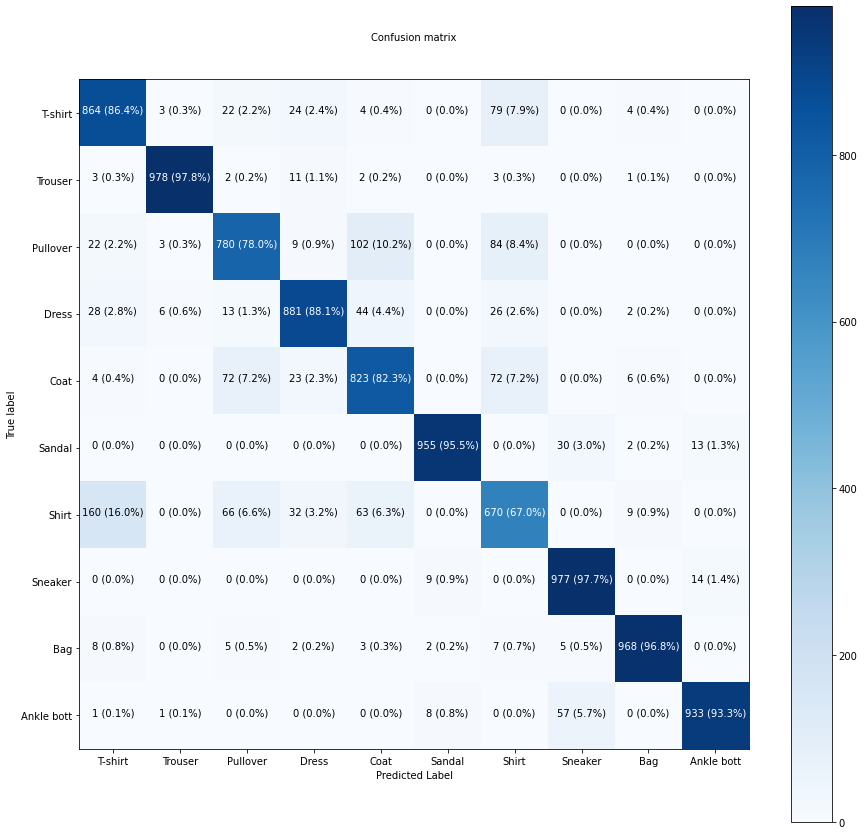

In [104]:
# Make a pretty confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize=(15,15))